In [1]:
from MerkleTree import *
import random

# 构建一颗Merkle树
mt = MerkleTree()
# nodeData = ['1','13','8','19','25','40','65','23','37','49']
nodeData = []
mt.build_merkle_tree(nodeData, way='imbalance')

构建了个寂寞


节点构造完成： Node(value=52, prime=769, hash=adc5f6e09f99ef2db5f68560c4ca0583d9a2731b965b1639b45b868ba5c394d6)


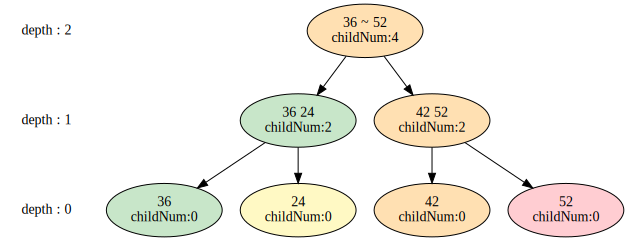

In [10]:
num = random.randint(1,99)
mt.add(str(num))
# mt.show()
mt.compare(showHistory=True)

In [11]:
# 展示这棵树
mt.getTreePrime()

['509', '479', '419', '769']

In [4]:
# mt.compare()

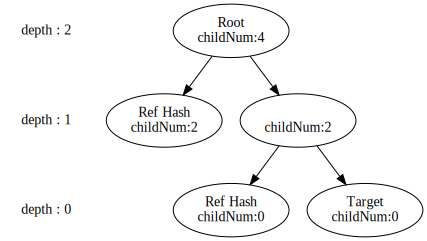

In [12]:
mynode, proofPath = mt.search(769)
mt.show(proofPath)

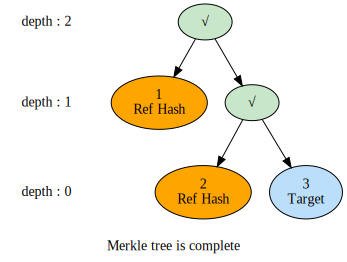

In [13]:
mt.merkle_path(proofPath)

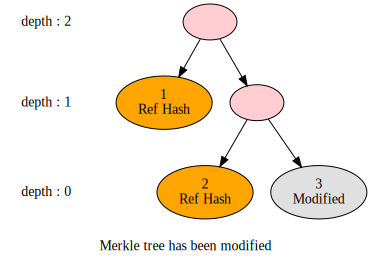

In [14]:
proofPath_2 = mt.tampering_test(proofPath,3)
mt.merkle_path(proofPath_2)